In [219]:
import numpy as np
import math
import matplotlib.pyplot as plt
import itertools

# Формулировака задания

**Проблема**. Для данного размера прямоугольника-стола *T* и данного множества опорных прямоугольных полиомино и опорных L-полиомино $P_{i}$ с данными соответствующими мощностями $N_{i}$ узнать, сущетсвует ли конфигурация полиомино с этими параметрами, являющееся замощением *T*.

Основной сложностью данной задачи является произвольность введенных полиомино по количеству и их виду. К примеру в статье [1], имеется лишь **один** вид полиомино одного-единственного размера.

Разумеется, не стоит выдумывать велосипед. Для данной задачи необходимо реализовать генетический алгоритм, описанный  в статье [2]. Но за неимением времени мы этого делать не будем, а решим задачу "в лоб".

**Инструкция**:

Для запуска программы, необходимо ввести в соответствующие переменные необходимые значения.

S - лист прямоугольных полиомино;

Q - лист L-полиомино.

В комментариях указаны сложность методов и необходимая им память (in bytes). n - высота, m - ширина, k - количество типов прямоугольного полиомино, N - количество определенного типа прямоугольного полиомино, l - количество типов L-полиомино, M - количество определенного типа L-полиомино.

## Прямоугольное полиомино

In [331]:
M_1, M_2 = 6, 6 # ширина и высота            8 bytes
T = (M_2, M_1) # размер стола                8 bytes
S = [((2, 2), 1), ((1, 1), 1)] # Прямоугольные полиомино             4*3*H bytes
Q = [((3, 2), 4), ((2, 2), 4)] # Л-полиомино 4*3*H bytes

In [332]:
s1 = sum([x[1] for x in S]) # Определяем количество прямоугольных полиомино 4 bytes
s2 = sum([x[1] for x in Q]) # Определяем количество Л-полиомино             4 bytes
  
cells_m = [[None for i in range(M_1)] for j in range(M_2)] # Определяем прямоугольный стол n*m*4 bytes

In [333]:
# Метод, показывающий, свободна ли клетка
def is_free(x, y):               # const
    if(y < 0 or x < 0):          # No memory
        return False
    try:
        if(cells_m[x][y] != None):
            return False
        else:
            return True
    except:
        return False
    
# Метод, устанавливающий прямоугольное полиомино ВЕРТИКАЛЬНО (label-общий номер полиомино, pol_w - ширина, pol_h - высота, x, y - координаты)
def place_rect_vert(label, pol_w, pol_h, x, y): # 2*n*m
    if(is_vert_fit(pol_w, pol_h, x, y)):        # Проверяем, можно ли установить прямоугольное полиомино ГОРИЗОНТАЛЬНО
        for i in range(x, x+pol_w):             # 4*(n+m) bytes
            for j in range(y, y+pol_h):
                try:
                    cells_m[i][j] = label       # Определяем место 
                except:
                    return False
        return True
    return False

# Метод, устанавливающий прямоугольное полиомино ГОРИЗОНТАЛЬНО (label-общий номер полиомино, pol_w - ширина, pol_h - высота, x, y - координаты)
def place_rect_hor(label, pol_w, pol_h, x, y):  # 2*n*m
    if(is_hor_fit(pol_w, pol_h, x, y)):         # Проверяем, можно ли установить прямоугольное полиомино ГОРИЗОНТАЛЬНО
        for i in range(x, x+pol_h):             # 4*(n+m) bytes
            for j in range(y, y+pol_w):
                try:
                    cells_m[i][j] = label       # Определяем место
                except:
                    return False
        return True
    return False

# Метод, осуществляющий проверку (ГОРИЗОНТАЛЬНУЮ): можно ли поместить полиомино с параметрами pol_w - ширина и pol_h - высота в заданную область
def is_hor_fit(pol_w, pol_h, x, y): #n*m
    for i in range(x, x+pol_h):                 # 4*(n+m) bytes
        for j in range(y, y+pol_w):
            if(is_free(i, j) == False):
                return False
    return True

# Метод, осуществляющий проверку (ВЕРТИКАЛЬНУЮ): можно ли поместить полиомино с параметрами pol_w - ширина и pol_h - высота в заданную область
def is_vert_fit(pol_w, pol_h, x, y):            # n*m
    for i in range(x, x+pol_w):                 # 4*(n+m) bytes
        for j in range(y, y+pol_h):
            if(is_free(i, j) == False):
                return False
    return True

# Метод, устанавливающий отдельно взятый из входного листа прямоугольный полиомино
def place_S_pol(count, pol_num):               # 2*n^2*m^2
    for x in range(T[0]+1):                    # 8*(n+m) bytes
        for y in range(T[1]+1):
            if(is_free(x, y)):
                    if(place_rect_hor(pol_num, S[count][0][0], S[count][0][1], x, y)): # Проверка: установлен ли полиомино ГОРИЗОНТАЛЬНО
                        pol_num+=1 # Увеличиваем счетчик помещенных полиомино
                        return True
                    if(place_rect_vert(pol_num, S[count][0][0], S[count][0][1], x, y)):# Проверка: установлен ли полиомино ВЕРТИКАЛЬНО
                        pol_num+=1 # Увеличиваем счетчик помещенных полиомино
                        return True
    return False
    
# Корневой метод для прямоугольных полиомино: определяется порядок помещения полиомино на доску
def S_pol(pol_num):                              # 2*k*N*n^2*m^2
    for count in range(len(S)):                  # 4*(k+N) + 8*(n+m)  bytes
        for num_of_pol in range(S[count][1]):
            if(place_S_pol(count, pol_num)):
                pol_num+=1 # Увеличиваем счетчик помещенных полиомино
            else:
                return False
    return pol_num

## L-полиомино

Названия методов, реализованных для L-полиомино, есть названия ориентаций L-полиомино на схеме, приведенной ниже, но адаптированные под синтаксис Python.

In [334]:
from IPython.display import Image # Библиотека для отображения картинок

display(Image(url='https://sun9-81.userapi.com/impg/dNXW1XWkPIi5znvFcOZyz4teTgiRmFwB9NqmIA/I7c7kEr6Zqg.jpg?size=2560x1930&quality=96&sign=d8a98a7783ac3389668ea9a1a3a20a07&type=album', 
              width = 1000)
       ) 

Итак, имея для L-полиомино 8 ориентаций, реализуем все 8 из них.

In [335]:
def is_UR_fit(pol_w, pol_h, x, y):       # UR - Up Right
    for i in range(x, x+pol_w):          # n+m
        if(is_free(i, y) == False):      # Проверяем, свободна ли данная клетка
            return False                 # 4*max(n, m) bytes
    for j in range(y, y+pol_h):
        if(is_free(x, j) == False):      # Проверяем, свободна ли данная клетка
            return False
    return True
    
def place_UR(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Up Right
    if(is_UR_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Up Right
        for i in range(x, x+pol_w):      # 2n+2m
            cells_m[i][y] = label        # 4*max(n, m) bytes
        for j in range(y, y+pol_h):
            cells_m[x][j] = label
        return True
    return False

def is_UL_fit(pol_w, pol_h, x, y):       # UL - Up Left
    for i in range(x, x+pol_w):          # n+m
        if(is_free(i, y) == False):      # Проверяем, свободна ли данная клетка
            return False                 # 4*max(n, m) bytes
    for j in range(y-pol_h+1, y):
        if(is_free(x, j) == False):      # Проверяем, свободна ли данная клетка
            return False
    return True

def place_UL(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Up Left
    if(is_UL_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Up Left
        for i in range(x, x+pol_w):      # 2n+2m
            cells_m[i][y] = label        # 4*max(n, m) bytes
        for j in range(y-pol_h+1, y):
            cells_m[x][j] = label
        return True
    return False

def is_DL_fit(pol_w, pol_h, x, y):       # DL - Down Left
    for i in range(x, x+pol_w):          # n+m
        if(is_free(i, y) == False):      # Проверяем, свободна ли данная клетка
            return False                 # 4*max(n, m) bytes
    for j in range(y-pol_h+1, y):
        if(is_free(x+pol_w-1, j) == False): # Проверяем, свободна ли данная клетка
            return False
    return True

def place_DL(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Down Left
    if(is_DL_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Down Left
        for i in range(x, x+pol_w):      # 2n+2m
            cells_m[i][y] = label        # 4*max(n, m) bytes
        for j in range(y-pol_h+1, y):
            cells_m[x+pol_w-1][j] = label 
        return True
    return False

def is_DR_fit(pol_w, pol_h, x, y):      # DR - Down Right
    for i in range(x, x+pol_w):         # n+m
        if(is_free(i, y) == False):     # Проверяем, свободна ли данная клетка
            return False                # 4*max(n, m) bytes
    for j in range(y, y+pol_h):
        if(is_free(x+pol_w-1, j) == False): # Проверяем, свободна ли данная клетка
            return False
    return True

def place_DR(pol_w, pol_h, x, y, label):    # Устанавливаем L-полиомино с ориентацией Down Right
    if(is_DR_fit(pol_w, pol_h, x, y)):      # Проверяем, можно ли установить L-полиомино с ориентацией Down Right
        for i in range(x, x+pol_w):         # 2n+2m
            cells_m[i][y] = label           # 4*max(n, m) bytes
        for j in range(y, y+pol_h):
            cells_m[x+pol_w-1][j] = label
        return True
    return False

def is_RU_fit(pol_w, pol_h, x, y):      # RU - Right Up
    for j in range(y, y+pol_w):         # n+m
        if(is_free(x, j) == False):     # Проверяем, свободна ли данная клетка
            return False                # 4*max(n, m) bytes
    for i in range(x-pol_h+1, x):  
        if(is_free(i, y+pol_w-1) == False): # Проверяем, свободна ли данная клетка
            return False
    return True
            
def place_RU(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Right UP
    if(is_RU_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Right UP
        for j in range(y, y+pol_w):      #2n+2m
            cells_m[x][j] = label        # 4*max(n, m) bytes
        for i in range(x-pol_h+1, x):
            cells_m[i][y+pol_w-1] = label
        return True
    return False

def is_RD_fit(pol_w, pol_h, x, y):      # RD - Right Down
    for j in range(y, y+pol_w):         # n+m
        if(is_free(x, j) == False):     # Проверяем, свободна ли данная клетка
            return False                # 4*max(n, m) bytes
    for i in range(x, x+pol_h):
        if(is_free(i, y+pol_w-1)==False): # Проверяем, свободна ли данная клетка
            return False
    return True

def place_RD(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Right Down
    if(is_RD_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Right Down
        for j in range(y, y+pol_w):      # 2n+2m
            cells_m[x][j] = label        # 4*max(n, m) bytes
        for i in range(x, x+pol_h):
            cells_m[i][y+pol_w-1] = label
        return True
    return False

def is_LU_fit(pol_w, pol_h, x, y):      # LU - Left Up
    for j in range(y-pol_w, y):         # n+m
        if(is_free(x, j) == False):     # Проверяем, свободна ли данная клетка
            return False                # 4*max(n, m) bytes
    for i in range(x-pol_h+1, x):
        if(is_free(i, y-pol_w) == False):  # Проверяем, свободна ли данная клетка
            return False
    return True

def place_LU(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Left Up
    if(is_LU_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Left Up
        for j in range(y-pol_w, y):      # 2n+2m
            cells_m[x][j] = label        # 4*max(n, m) bytes
        for i in range(x-pol_h+1, x):
            cells_m[i][y-pol_w] = label
        return True
    return False

def is_LD_fit(pol_w, pol_h, x, y):     # LD - Left Down
    for j in range(y-pol_w, y):        # n+m
        if(is_free(x, j) == False):    # Проверяем, свободна ли данная клетка
            return False               # 4*max(n, m) bytes
    for i in range(x, x+pol_h): 
        if(is_free(i, y-pol_w) == False):  # Проверяем, свободна ли данная клетка
            return False
    return True

def place_LD(pol_w, pol_h, x, y, label): # Устанавливаем L-полиомино с ориентацией Left Down
    if(is_LD_fit(pol_w, pol_h, x, y)):   # Проверяем, можно ли установить L-полиомино с ориентацией Left Down
        for j in range(y-pol_w, y):      # 2n+2m
            cells_m[x][j] = label        # 4*max(n, m) bytes
        for i in range(x, x+pol_h):
            cells_m[i][y-pol_w] = label
        return True
    return False

def place_L_pol(count, pol_num, priorities):         # Метод, устанавливающий отдельно взятый L-полиомино
    methods = [place_RU, place_LU, place_RD, place_LD, place_UL, place_UR, place_DL, place_DR]
    for x in range(T[0]+1):              # 16*n*m*(n+m)
        for y in range(T[1]+1):          # 4*(n+m) + 4*max(n, m) bytes
            if(is_free(x, y)):
                if(place_RD(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_LD(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_RU(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_LU(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_UL(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_UR(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_DL(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
                if(place_DR(Q[count][0][0], Q[count][0][1], x, y, pol_num)):
                    pol_num+=1
                    return True
    return False
         
# Корневой метод для L-полиомино: определяется порядок помещения полиомино на доску
def L_pol(pol_num):                            # l*M*16*n*m*(n+m)
    priorities = itertools.permutations([0, 1, 2, 3, 4, 5, 6, 7])
    for count in range(len(Q)):
        for num_of_pol in range(Q[count][1]):  # 4*(l+M) + 4*(n+m) + 4*max(n, m) bytes
            if(place_L_pol(count, pol_num, priorities)):
                pol_num+=1
            else:
                return False
    return pol_num

## Результат

In [336]:
answers = [] # Алгоритм запускается 2 раза, поэтому имеем лист с ответами 2 bits
configurations = [] # Две результирующие матрицы
pol_num = 0 # счетчик полиомино                                           4 bytes
pol_num = S_pol(pol_num)          
pol_num = L_pol(pol_num)
if(pol_num == False):
    answers.append(False)
else:
    answers.append(True)
pol_num = 0 # счетчик полиомино
configurations.append(cells_m)
cells_m = [[None for i in range(M_1)] for j in range(M_2)]
pol_num = L_pol(pol_num)
pol_num = S_pol(pol_num)
if(pol_num == False):
    answers.append(False)
else:
    answers.append(True)
configurations.append(cells_m)   

# Memory needed: max(4*(l+M) + 4*(n+m) + 4*max(n, m), 4*(k+N) + 8*(n+m))

In [337]:
if(answers.count(True) > 0):
    print('Answer is "Yes"')
else:
    print('Answer is "No"')

Answer is "Yes"


In [338]:
answers

[True, False]

In [339]:
try:
    cells_m = configurations[answers.index(True)]
except:
    print('The answer is "No"')

In [340]:
labels = np.arange(s1+s2)
colors = ('#FA5454', '#21D3B6', '#3384FA', '#FFD256', '#62ECFA', '#FFCEC8', '#CDEFE8', '#00334E', '#FF5D00', '#190900', '#BAB5B2', '#C9A6A0')
cdict = dict(zip(labels, colors)) #Color dictionnary for plotting

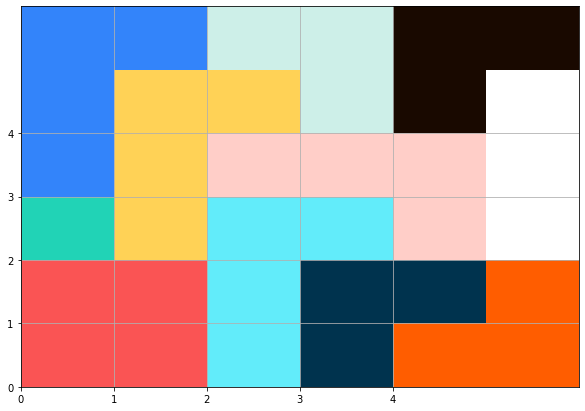

In [341]:
try:
    plt.figure(figsize = (10, 7))
    plt.grid(True)
    plt.axis([0,T[0],0,T[1]])
    plt.yticks(np.arange(0, T[0]-1, 1.0))
    plt.xticks(np.arange(0, T[1]-1, 1.0))
    for j in range(T[1]):
        for i in range(T[0]):
            if(cells_m[i][j] != None):
                rect = plt.Rectangle((i, j), 1, 1, fc = cdict[cells_m[i][j]])
                plt.gca().add_patch(rect)
except:
    print('Error occured...')

In [342]:
cells_m

[[0, 0, 1, 2, 2, 2],
 [0, 0, 3, 3, 3, 2],
 [4, 4, 4, 5, 3, 6],
 [7, 7, 4, 5, 6, 6],
 [8, 7, 5, 5, 9, 9],
 [8, 8, None, None, None, 9]]

[1] - https://cyberleninka.ru/article/n/metody-tselochislennogo-lineynogo-programmirovaniya-v-zadache-neregulyarnogo-razmescheniya-ploskih-geometricheskih-obektov-v-forme/viewer

[2] - https://www.ugatu.su/media/uploads/MainSite/Science/dissovet/03/2014/ChirikovHY/autoref.pdf